## Libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import sys
sys.path.insert(1, '../')
from glob import glob
import helpers.dataset_stats as ds
import helpers.convergence_stats as cs
import helpers.scalability_stats as ss
import helpers.sig_freq_itemsets_analyzer as sig
import helpers.numfreqitemsets_stats as ns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from itertools import combinations

In [3]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['axes.labelweight'] = 'bold'
matplotlib.rcParams['axes.spines.top'] = 'False'
matplotlib.rcParams['axes.spines.right'] = 'False'
matplotlib.rcParams['axes.spines.left'] = 'False'
matplotlib.rcParams['axes.spines.bottom'] = 'False'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.grid.axis'] = 'y'
matplotlib.rcParams['axes.titleweight'] = 'bold'
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20 
matplotlib.rcParams['legend.markerscale'] = 2
matplotlib.rcParams['legend.fontsize'] = 18 
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

/var/folders/2q/_5nlf385019g2f7b2thjfwdh_x8ppd/T/ipykernel_87394/790388694.py:16: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']


In [4]:
palette = sns.color_palette(['#2E4052', '#AC3931', '#2CEAA3', '#01BAEF',
                             '#BDD9BF', '#EF767A', '#8332AC'])

In [5]:
datasets = ['BMS1', 'BMS2', 'chess', 'foodmart', 'mushrooms']
ones = {'BMS1' : 149639,
        'BMS2' : 358278,
        'chess' : 118252,
        'foodmart' : 18319,
        'mushrooms' : 193568}

In [55]:
samplers = ['GmmtSampler', 'caterpillars.samplers.NaiveBJDMSampler', 
            'caterpillars.samplers.CurveballBJDMSampler']
sampler_names = {'GmmtSampler' : 'GMMT',
                 'diffusr.samplers.GmmtSampler': 'GMMT',
                 'caterpillars.samplers.NaiveBJDMSampler' : 'Naive',
                 'caterpillars.samplers.CurveballBJDMSampler' : 'Curveball'}

In [6]:
data_dir = '../datasets/'
fig_dir = '/Users/u0m0518/Documents/Projects/NullModels/random-butterflies/paper/figures/'

## Dataset Stats

In [7]:
stats_df = pd.DataFrame()
for dataset in datasets:
    stats = ds.get_dataset_stats(data_dir, dataset)
    stats_df = stats_df.append([stats])

In [8]:
stats_df.columns = ['Dataset', 'Transaction Num', 'Item Num', 
                    'Sum Transaction Lengths',   'AVG Transaction Length', 
                    'Density']

In [9]:
print(stats_df.to_latex(index=False, float_format="%.4f", column_format='lrrrrr',
                        caption='Statistics of the real datasets.',
                        label='tbl:datasets', position='!ht'))

\begin{table}[!ht]
\centering
\caption{Statistics of the real datasets.}
\label{tbl:datasets}
\begin{tabular}{lrrrrr}
\toprule
  Dataset &  Transaction Num &  Item Num &  Sum Transaction Lengths &  AVG Transaction Length &  Density \\
\midrule
     BMS1 &            59602 &       497 &                   149639 &                  2.5106 &   0.0051 \\
     BMS2 &            77512 &      3340 &                   358278 &                  4.6222 &   0.0014 \\
    chess &             3196 &        75 &                   118252 &                 37.0000 &   0.4933 \\
 foodmart &             4141 &      1559 &                    18319 &                  4.4238 &   0.0028 \\
mushrooms &             8416 &       119 &                   193568 &                 23.0000 &   0.1933 \\
\bottomrule
\end{tabular}
\end{table}



37 3195


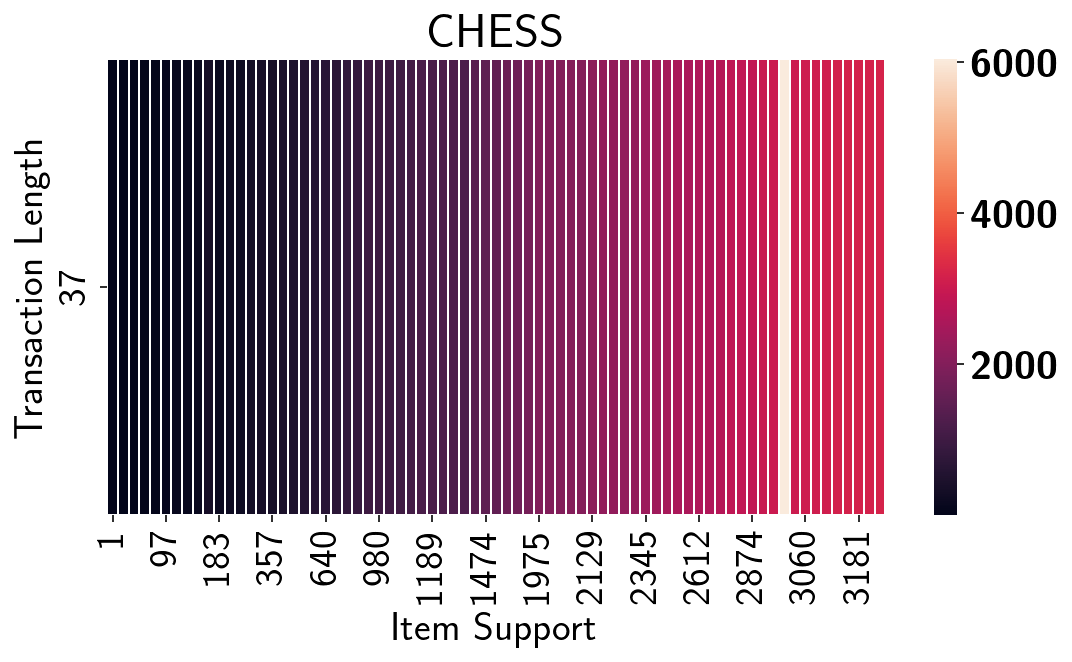

14 25


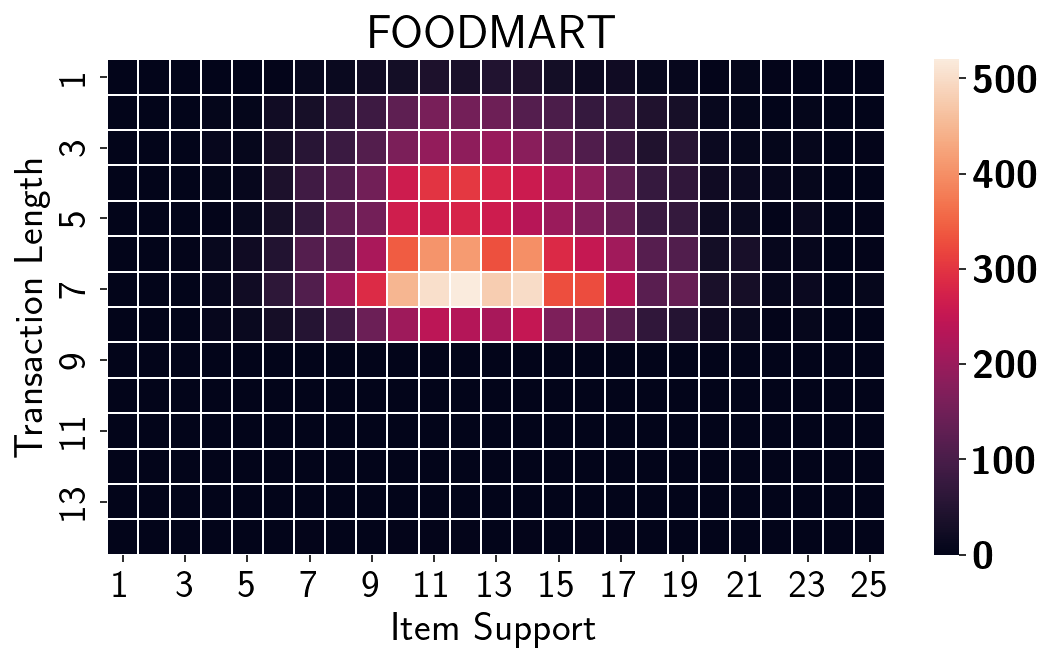

23 8416


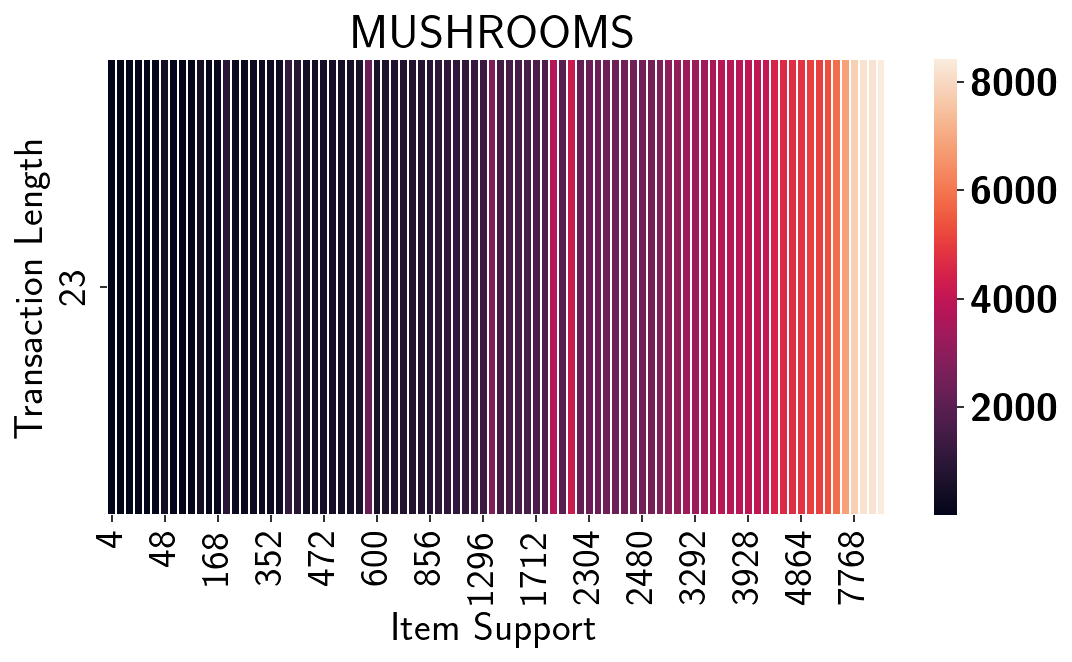

In [33]:
stats_df = pd.DataFrame()
for dataset in ['chess', 'foodmart', 'mushrooms']:
    BJDM, max_len = ds.compute_BJDM(data_dir, dataset)
    bjdm_df = pd.DataFrame(BJDM)
    fig, ax = plt.subplots(figsize=(8,5))
    data = bjdm_df
    if BJDM.shape[0] == 1:
        data = bjdm_df[bjdm_df>0].T.dropna().T
    sns.heatmap(data=data, linewidths=1, ax=ax)
    ax.set_ylabel('Transaction Length')
    ax.set_xlabel('Item Support')
    x_labels = []
    for l in ax.get_xticklabels():
        x_labels.append(str(int(l.get_text())+1))
    y_labels = []
    if BJDM.shape[0] == 1:
        y_labels.append(str(max_len))
    else:
        for l in ax.get_yticklabels():
            y_labels.append(str(int(l.get_text())+1))
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)
    ax.set_title(dataset.upper())
    plt.tight_layout()
    plt.show()

## Scalability

In [111]:
result_dir = '../output/scalability/'
files = glob(result_dir+'*')

In [112]:
results_df = pd.DataFrame()
for file in files:
    file_name = file.split('/')[-1][:-4]
    db = file_name.split('-')[0]
    tmp_df = ss.get_scalability_df(file, file_name)
    tmp_df['DataSet'] = db
    results_df = results_df.append(tmp_df, ignore_index=True)

diffusr.samplers.GmmtSampler not found in file
diffusr.samplers.GmmtSampler not found in file


In [113]:
results_df.head()

,Number of transactions,Step time (ms),Algorithm,DataSet
0,20000,0,Naive,synthetic
1,20000,0,Naive,synthetic
2,20000,0,Naive,synthetic
3,20000,1,Naive,synthetic
4,20000,5,Naive,synthetic


### Synthetic Datasets

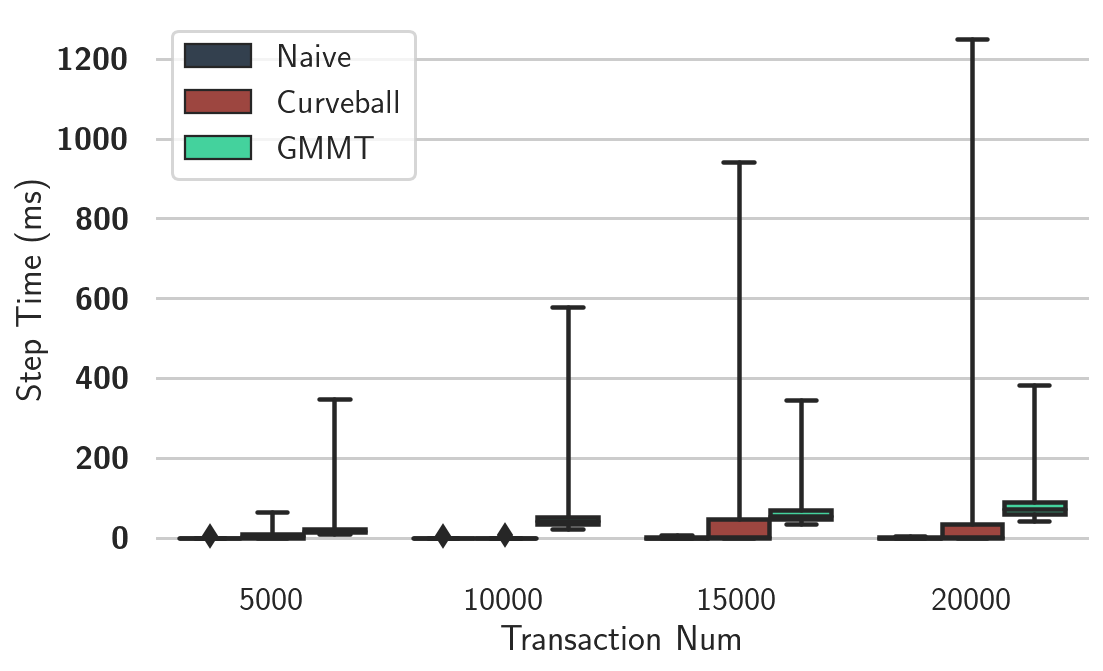

In [114]:
fig, ax = plt.subplots(figsize=(8,5))

data = results_df[results_df['DataSet']=='synthetic']
sns.set_theme(style='whitegrid', context='talk')
sns.boxplot(data=data, x='Number of transactions', whis=100,
            palette=palette, fliersize=8, y='Step time (ms)', 
            hue='Algorithm', ax=ax)
# ax.set_ylim(top=100, bottom=0)
ax.set_xlabel('Transaction Num')
ax.set_ylabel('Step Time (ms)')
ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()
# plt.savefig(fig_dir+'scalability.pdf')

In [115]:
results_df

,Number of transactions,Step time (ms),Algorithm,DataSet
0,20000,0,Naive,synthetic
1,20000,0,Naive,synthetic
2,20000,0,Naive,synthetic
3,20000,1,Naive,synthetic
4,20000,5,Naive,synthetic
...,...,...,...,...
120,10000000,7,GMMT,chess
121,10000000,16,GMMT,chess
122,10000000,24,GMMT,chess
123,10000000,38,GMMT,chess


### Real Datasets

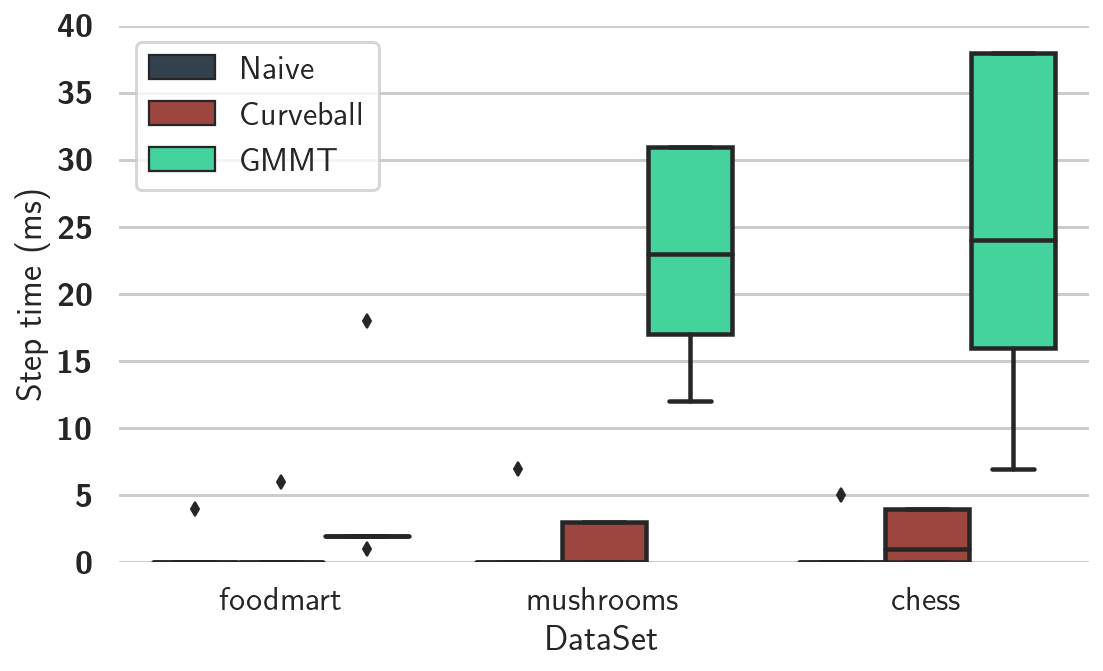

In [33]:
fig, ax = plt.subplots(figsize=(8,5))

data = results_df[results_df['DataSet'].isin(['foodmart', 'mushrooms', 'chess'])]
sns.boxplot(data=data, x='DataSet', 
            palette=palette, dodge=True,
            y='Step time (ms)', hue='Algorithm')
ax.set_ylim(top=40, bottom=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend()
plt.tight_layout()
#     plt.savefig(fig_dir+'scalability.pdf')

## Convergence

In [34]:
result_dir = '../output/convergence/'
files = glob(result_dir+'*')

In [35]:
conv_df = pd.DataFrame()
for file in files:
    db = file.split('/')[-1][:-4].split('-')[0]
    tmp_df = cs.get_convergence_df(file)
    tmp_df['DataSet'] = db
    conv_df = conv_df.append(tmp_df)

diffusr.samplers.GmmtSampler not found in file
diffusr.samplers.GmmtSampler not found in file
diffusr.samplers.GmmtSampler not found in file
diffusr.samplers.GmmtSampler not found in file
diffusr.samplers.GmmtSampler not found in file


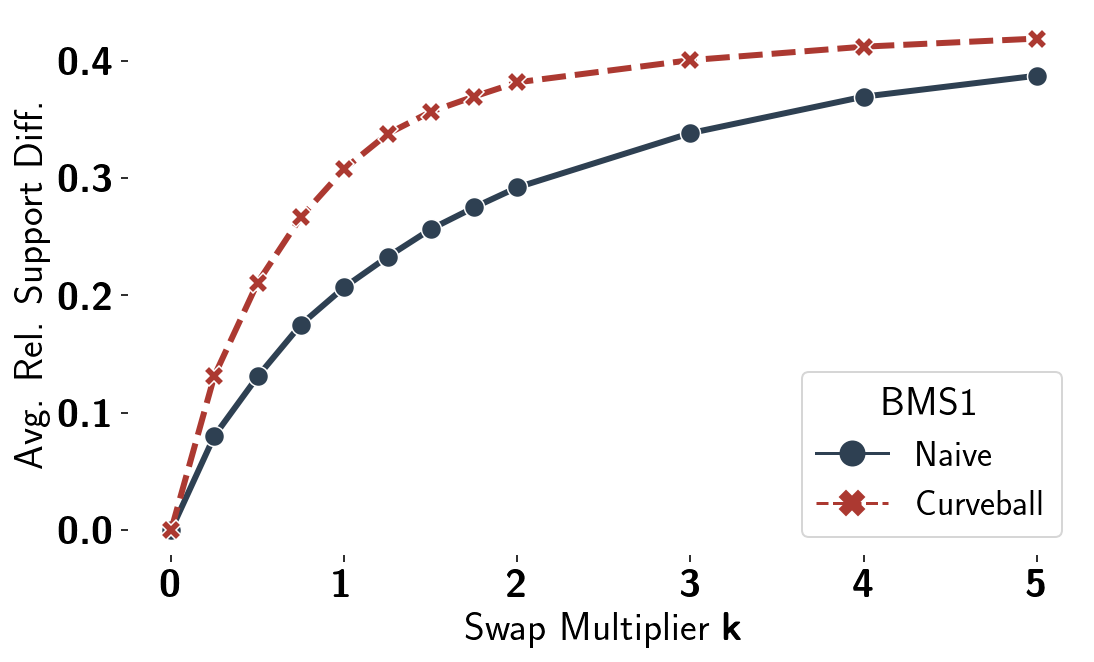

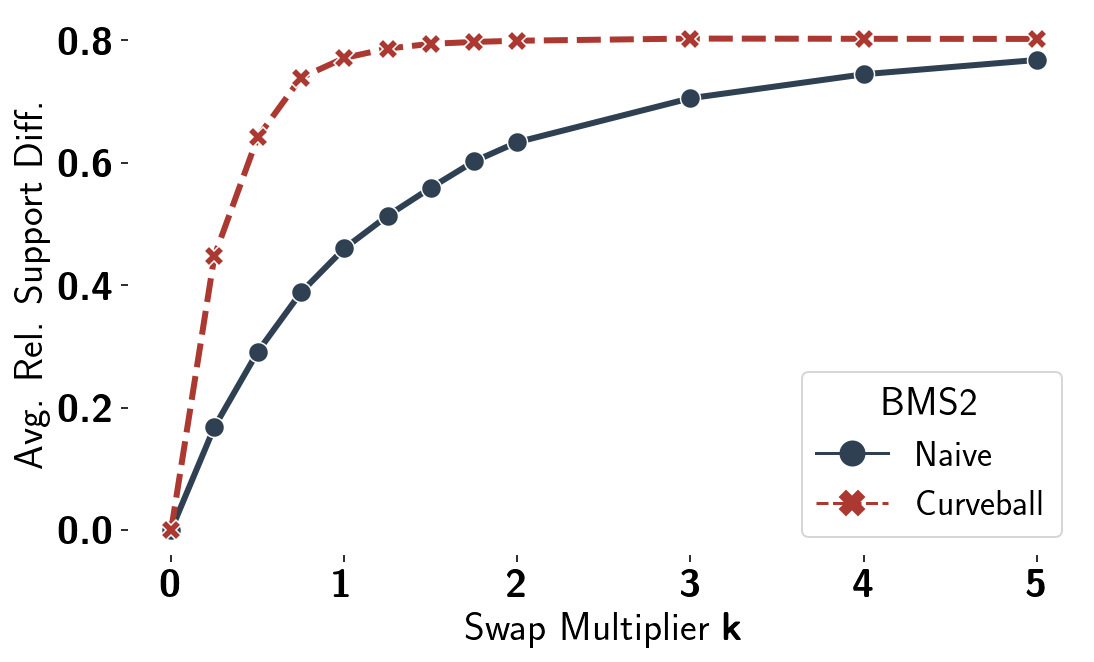

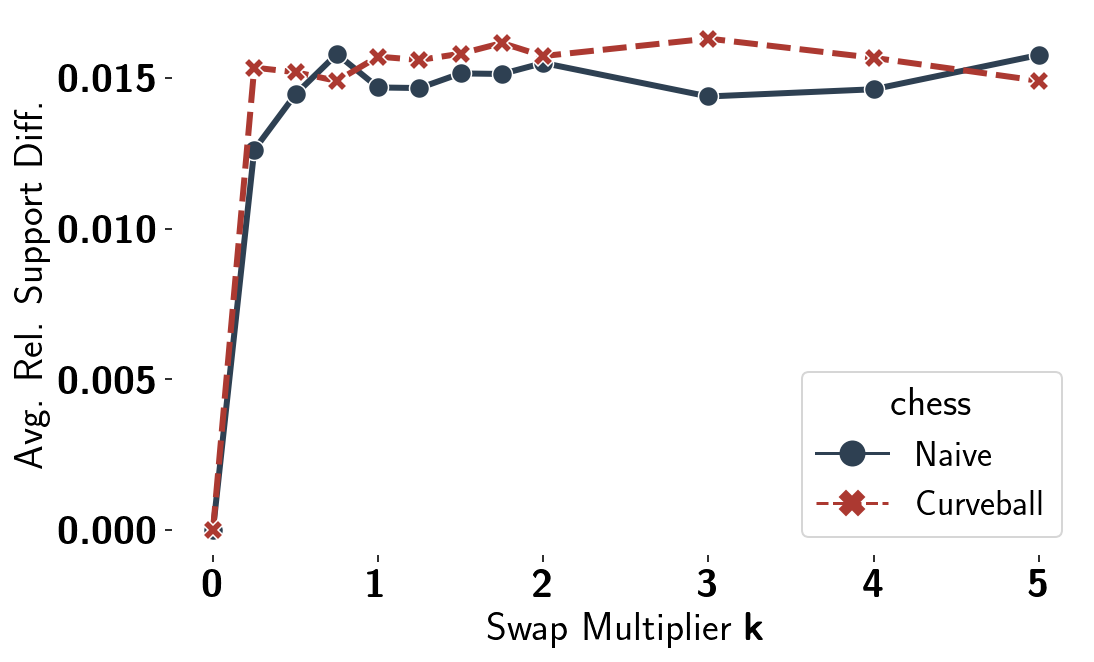

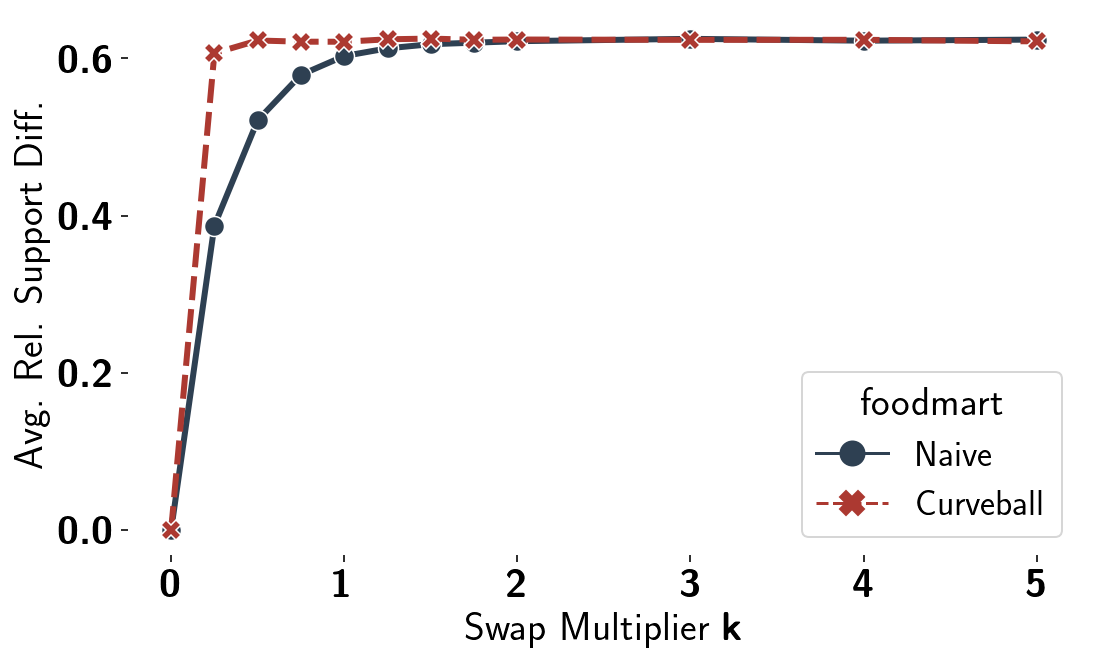

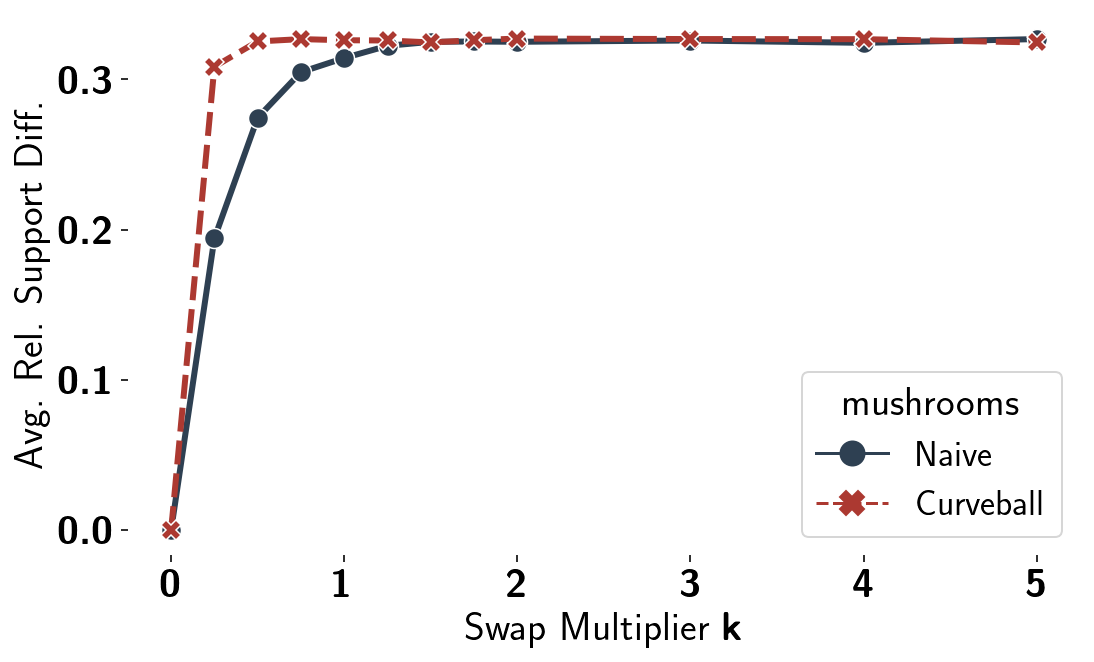

In [36]:
for dataset in datasets:
    data = conv_df[conv_df['DataSet']==dataset]
    num_colors = len(data['Algorithm'].unique())
    if not data.empty:
        fig, ax = plt.subplots(figsize=(8,5))
        sns.lineplot(data=data, x='Num Swap Multiplier', palette=palette[:num_colors], 
                     style='Algorithm', markers=True, markersize=10, ax=ax,
                     linewidth=3, y='Avg. Rel. Support Diff.', hue='Algorithm')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.set_xlabel(r'Swap Multiplier $k$')
        ax.legend(title=dataset)
        plt.tight_layout()
        plt.savefig(fig_dir+f'convergence_{dataset}.pdf')

## Step Time

In [7]:
result_dir = '../output/scalability/'
files = glob(result_dir+'*')

In [9]:
swap_df = pd.DataFrame()
for file in files:
    file_name = file.split('/')[-1][:-4]
    db = file_name.split('-')[0]
    tmp_df = ss.get_step_times_df(file)
    tmp_df['DataSet'] = db
    swap_df = swap_df.append(tmp_df, ignore_index=True)

diffusr.samplers.GmmtSampler not found in file
diffusr.samplers.GmmtSampler not found in file


In [17]:
swap_df.columns = ['Algorithm', 'min', 'Q1', 'med.', 'Q3', 'max', 'Dataset']
swap_df = swap_df[['Dataset', 'Algorithm', 'min', 'Q1', 'med.', 'Q3', 'max']]

In [20]:
sorted_df = swap_df[swap_df['Dataset'] != 'synthetic'].sort_values(by=['Dataset', 'Algorithm'])

In [23]:
print(sorted_df.to_latex(index=False, column_format='llrrrrr',
                        caption='Step time (ms): minimum, 1st quartile, median, 3rd quartile, and maximum over 10K steps.',
                        label='tbl:steptime', position='!ht'))

\begin{table}[!ht]
\centering
\caption{Step time (ms): minimum, 1st quartile, median, 3rd quartile, and maximum over 10K steps.}
\label{tbl:swaptime}
\begin{tabular}{llrrrrr}
\toprule
  Dataset & Algorithm &  min &  Q1 &  med. &  Q3 &  max \\
\midrule
     BMS1 & Curveball &    0 &   0 &     0 &   1 &    5 \\
     BMS1 &     Naive &    0 &   0 &     0 &   0 &    4 \\
     BMS2 & Curveball &    0 &   0 &     0 &   1 &    8 \\
     BMS2 &     Naive &    0 &   0 &     0 &   0 &    5 \\
    chess & Curveball &    0 &   0 &     1 &   4 &   61 \\
    chess &      GMMT &    7 &  16 &    24 &  38 &  407 \\
    chess &     Naive &    0 &   0 &     0 &   0 &    5 \\
 foodmart & Curveball &    0 &   0 &     0 &   0 &    6 \\
 foodmart &      GMMT &    1 &   2 &     2 &   2 &   18 \\
 foodmart &     Naive &    0 &   0 &     0 &   0 &    4 \\
mushrooms & Curveball &    0 &   0 &     0 &   3 &  134 \\
mushrooms &      GMMT &   12 &  17 &    23 &  31 &  323 \\
mushrooms &     Naive &    0 &   0 &    

## Num Frequent Itemsets

In [42]:
result_dir = '../output/numFreqItemsets'

In [ ]:
# db_config = {'foodmart':'18319-2048-3.0E-4-0.05-32-0',
#              'chess':'118252-2048-0.8-0.05-32-0',
#              'mushrooms':'193568-1568-0.3-0.05-8-0'}

In [ ]:
numfreq_df = pd.DataFrame()
for db,conf in db_config.items():
    try:
        filepath = f'{result_dir}/{db}-{conf}.json'
        df = ns.get_num_freq_itemsets_stats(filepath)
        df['DataSet'] = db
    except Exception as e:
        pass
numfreq_df = numfreq_df.append(df, ignore_index=True)

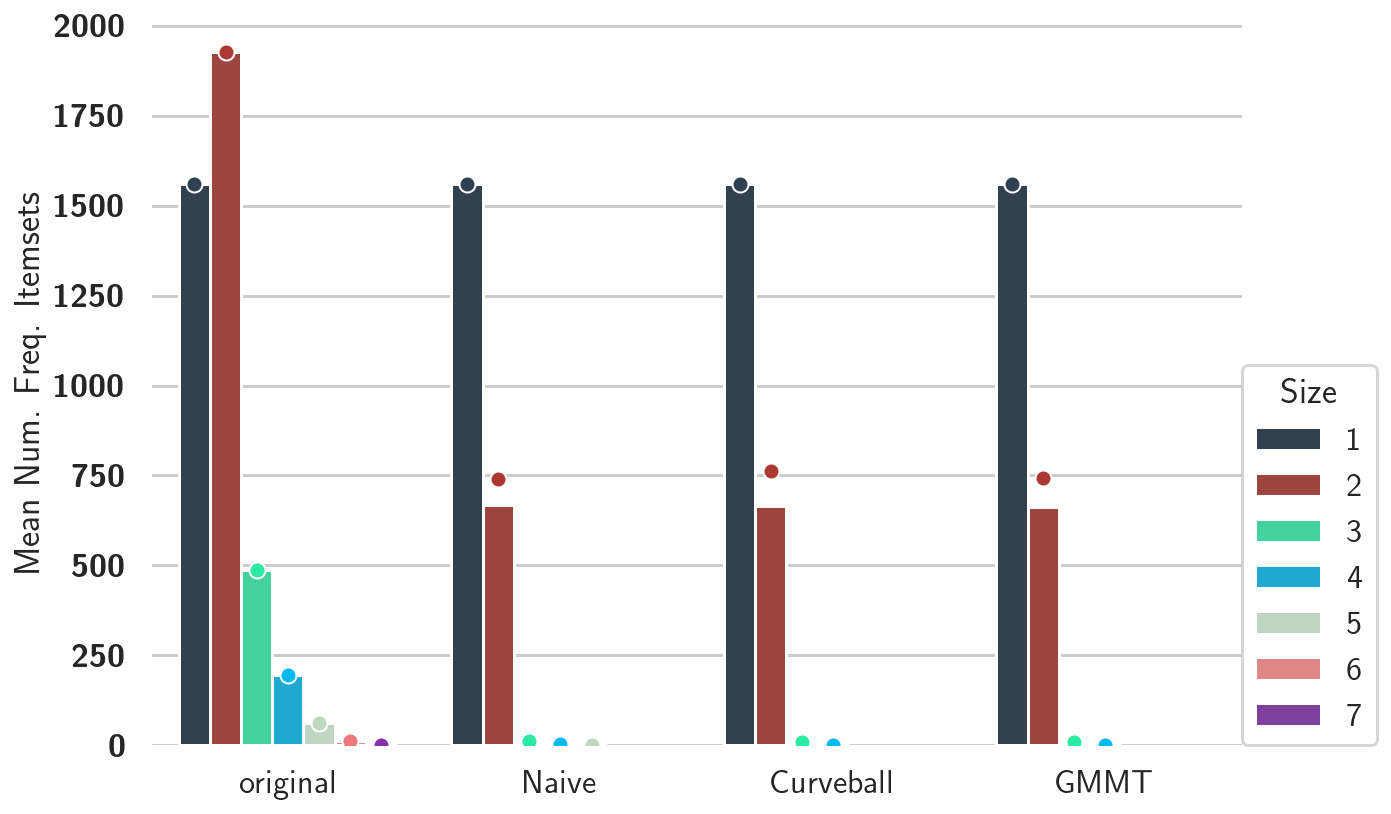

In [94]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style='whitegrid', context='talk')
f = sns.barplot(data=df, x='Algorithm', hue='Size',
            palette=palette, y='med')
h,l = f.get_legend_handles_labels()
g = sns.swarmplot(data=df, x='Algorithm', hue='Size',
              edgecolor='white', linewidth=1, label='_nolegend_',
              dodge=True, palette=palette, y='max', size=8)
g.legend().remove()
ax.legend(h,l, title='Size', loc=(1,0))
ax.set_ylabel('Mean Num. Freq. Itemsets')
ax.set_xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()
# plt.savefig(fig_dir+f'{db}_numFreqItemsets.pdf')
plt.show()

In [117]:
df.sort_values(by='Size')

,Size,Algorithm,min,Q1,med,Q3,max
0,1,original,1559,1559,1559,1559,1559
16,1,GMMT,1559,1559,1559,1559,1559
12,1,Curveball,1559,1559,1559,1559,1559
7,1,Naive,1559,1559,1559,1559,1559
1,2,original,1928,1928,1928,1928,1928
17,2,GMMT,568,645,663,680,742
13,2,Curveball,572,649,665,683,762
8,2,Naive,594,651,668,685,741
14,3,Curveball,1,2,3,4,9
9,3,Naive,1,2,3,4,13


In [ ]:
TODO: check p values of different samplers

## Significant Itemset Mining

In [98]:
result_dir = '../output/significantItemsets'

In [102]:
db_config = {'foodmart':'18319-2048-128-3.0E-4-0.05-32-0',
             'chess':'118252-2048-128-0.8-0.05-32-0',
             'mushrooms':'193568-1568-128-0.3-0.05-32-0'}

In [103]:
results = []
for db,conf in db_config.items():
    for p in combinations(samplers, 2):
        try:
            fileA = f'{result_dir}/{db}-{p[0]}-{conf}.json'
            fileB = f'{result_dir}/{db}-{p[1]}-{conf}.json'
            num_a, num_b, jac, a_in_b, b_in_a = sig.analyze(fileA, fileB)
            results.append([db, p[0], p[1], jac, num_a, a_in_b])
            results.append([db, p[1], p[0], jac, num_b, b_in_a])
        except Exception as e:
            pass
sig_df = pd.DataFrame(results)
sig_df.columns = ['DataSet', 'Algorithm', 'Other', 'Jaccard', 'NumSignItemsets', 'isSubset']
sig_df['Algorithm'] = sig_df['Algorithm'].apply(lambda x: sampler_names[x])
sig_df['Other'] = sig_df['Other'].apply(lambda x: sampler_names[x])

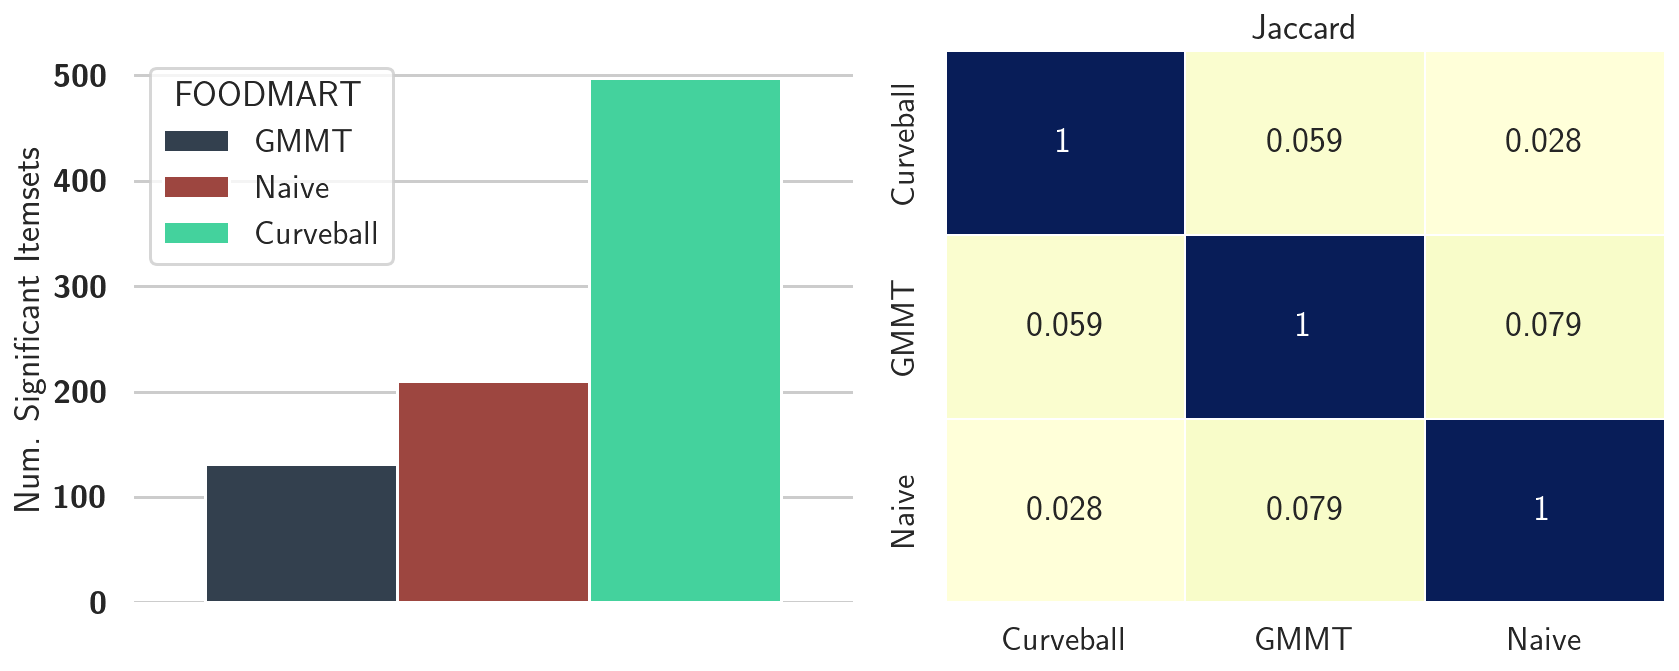

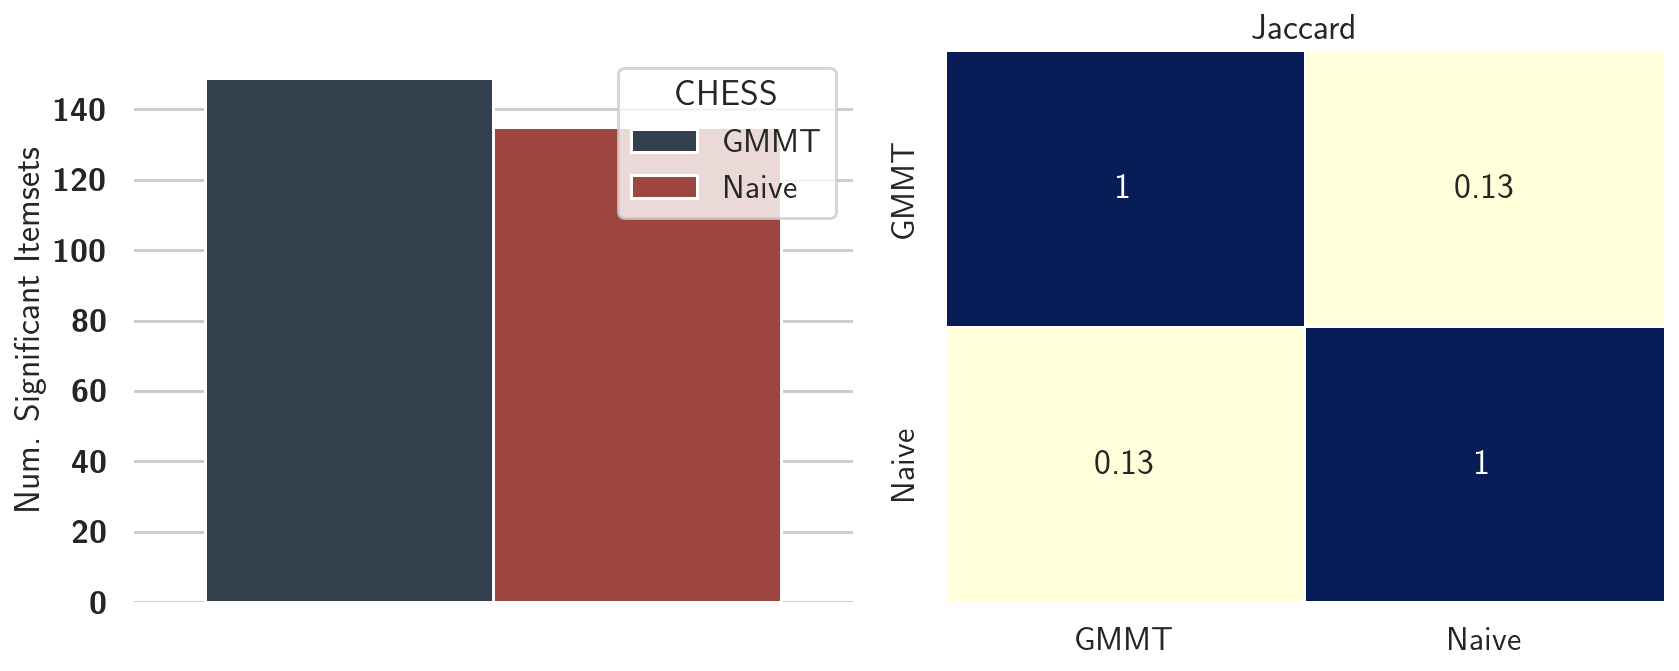

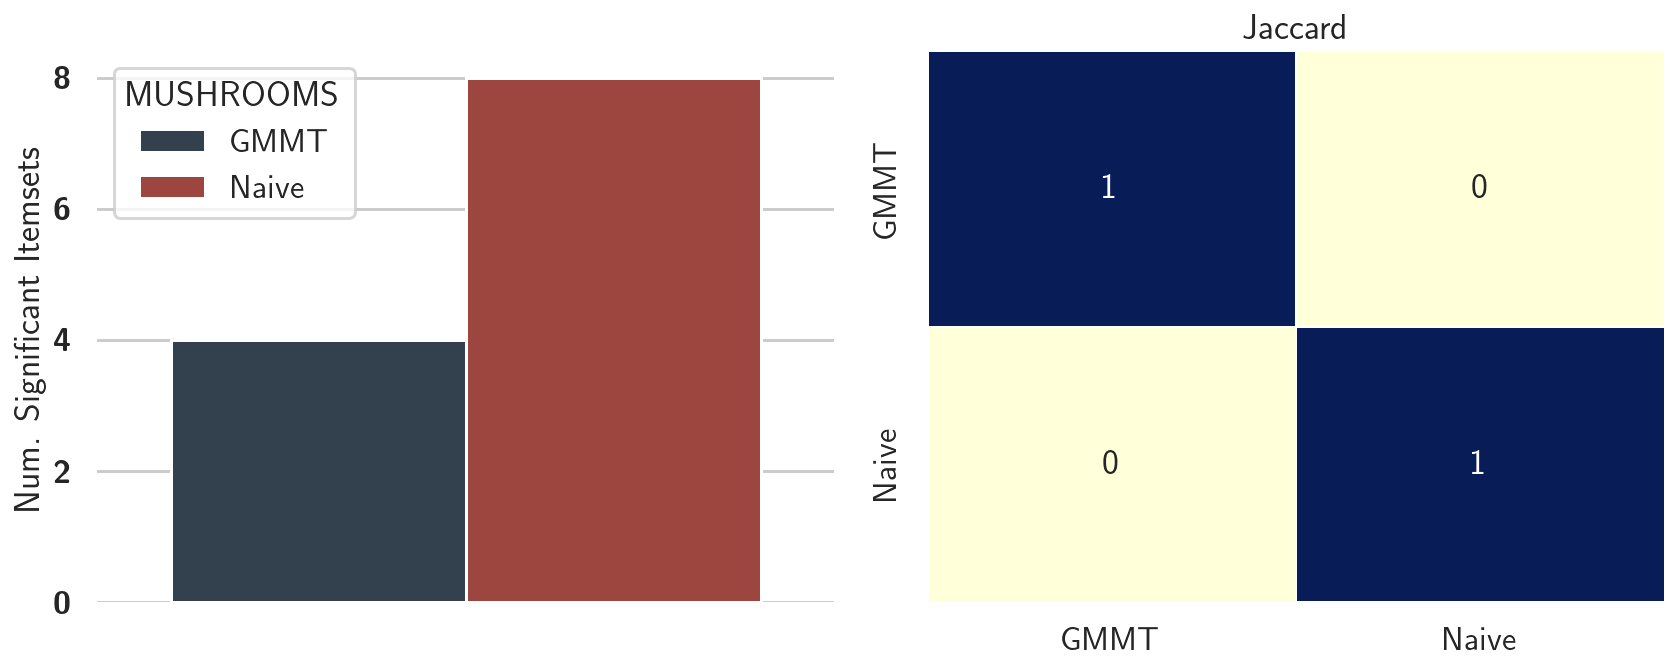

In [110]:
for dataset in sig_df['DataSet'].unique():
    data = sig_df[sig_df['DataSet']==dataset]
    if data.empty: continue
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    
    # num significant itemsets
    sns.barplot(data=data, x='DataSet', hue='Algorithm',
            palette=palette, y='NumSignItemsets', ax=ax[0])
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['bottom'].set_visible(False)
    ax[0].legend(title=dataset.upper())
    ax[0].set_ylabel('Num. Significant Itemsets')
    ax[0].set_xlabel('')
    ax[0].set_xticklabels('')

    sns.heatmap(data=data.pivot('Algorithm', 'Other', 'Jaccard').fillna(1),
                annot=True, linewidths=1, cmap="YlGnBu", cbar=False, ax=ax[1])
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')
    ax[1].set_title('Jaccard')
    plt.tight_layout()
#     plt.savefig(fig_dir+f'{dataset}_sigFreqItemsets_jaccard.pdf')
    plt.show()